## PCA의 동작 과정
1. 데이터 표준화 및 원점 이동
- 단위 통일 및 데이터의 중심 지점이 원점이 되도록 위치 이동

2.  주성분 찾기
- 주성분이란?  데이터들의 중심(원점)을 지나면서 모든 데이터들에서의 수직 거리의 합이 가장 가깝도록 하는 선
- n차원이면 선은 n개

3. 데이터 투영하기
- 투영이란, 쉽게 얘기해서 데이터들을 주성분 위로 옮기는 과정을 의미

4. 새로운 축 기준으로 데이터 회전하기
- 새롭게 만들어진 변수인 첫 번째 주성분(PC1)과 두 번째 주성분(PC2)이 각각 x축과 y축이 될 수 있도록 축과 데이터 전체를 회전
- 만약에 2차원인 데이터를 1차원으로 줄이고 싶다면 PC1만을 사용해서 데이터를 나타내면 됩니다.
- 2차원으로 나타내려면 PC1과 PC2 두 개의 축으로 이루어진 좌표 평면에 데이터들을 표현


## 주성분 찾는 방법
 데이터와 주성분 사이의 거리가 최소가 되도록 선을 찾으면 주성분으로 데이터들을 투영했을 때 해당 데이터가 퍼져있는 정도, 즉 분산이 커집니다.
 
1. PCA에서 데이터의 특징을 가장 잘 설명하는 주성분을 찾는 것은 데이터들과 선 사이의 수직 거리 합이 최소가 되는 선을 찾으면 되는 것
: PCA 연산에서는 투영하였을 때 데이터들 사이의 분산이 최대가 되도록 하는 선을 찾는 방식으로 주성분을 찾습니다.


In [48]:
import pandas as pd
import seaborn as sns

scaled_df = pd.read_csv('data/scaled_df.csv')

In [49]:
from sklearn.decomposition import PCA

# 모델 생성
pca = PCA(n_components=2) # 차원을 2개로 줄이기 위해 2로 설정
pca.fit(scaled_df) # pca학습
scaled_df_pca = pca.transform(scaled_df) # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pca) # 데이터프레임으로 변환

# scaled_df_pca = pca.fit_transform(scaled_df) # pca학습 및 데이터변환

pca_df.columns = ['PC1', 'PC2']
pca_df.head()

,PC1,PC2
0,3.043476,0.646301
1,-1.926976,0.528713
2,1.501383,-0.117994
3,-1.168100,-1.373146
4,-0.226542,-0.077045


<Axes: xlabel='PC1', ylabel='PC2'>

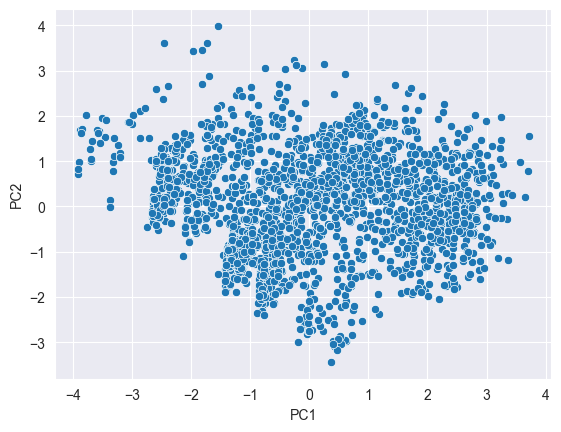

In [50]:
# 시각화
sns.scatterplot(data=pca_df, x='PC1', y='PC2')

PC1의 분포는 -4에서 4로 PC2의 분포인 -3에서 4보다 조금 더 넓게 분포해 있는 것이 확인

## 적절한 주성분 수 구하기

PCA를 적용할 때 몇개의 주성분으로 차원을 축소할지 정해야하기 때문에 Scree plot 사용

### Scree plot이란?
- 각 주성분이 전체 데이터에 대해서 갖는 설명력 비율을 시각화한 플롯
- 전체 주성분의 분산 대비 특정 주성분의 분산의 비율을 시각화한 것

In [51]:
pca = PCA(n_components=6)
pca.fit(scaled_df) # PCA 학습
scaled_df_pc = pca.transform(scaled_df) # PC로 변환
pca_df = pd.DataFrame(scaled_df_pc) # 데이터프레임으로 변환
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.043476,0.646301,0.249843,0.704499,-0.066913,0.376684
1,-1.926976,0.528713,-0.431355,1.255031,0.085687,0.642017
2,1.501383,-0.117994,-0.800846,0.379732,-0.367393,-0.553751
3,-1.168100,-1.373146,-0.668054,-0.608071,0.036437,-0.285106
4,-0.226542,-0.077045,1.553274,-1.107927,-0.463466,-0.381861


6개의 PC가 각각 전체 데이터에 대해서 어느 정도의 설명력을 가지는지, 즉 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인
각 주성분의 분산 비율을 계산하기 위해서는 scikit-learn의 PCA에 있는 explained_variance_ratio_ 속성을 활용

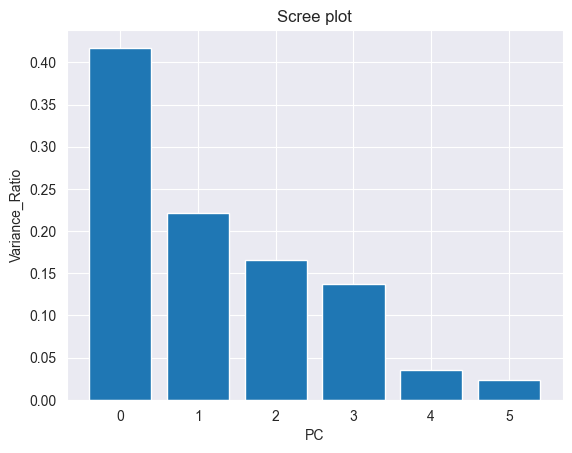

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_

plt.bar(x, var) # Bar plot 그리기

plt.xlabel('PC') # x축 라벨
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.show()

주성분 1(PC1)은 전체 주성분이 설명해 주는 데이터의 특성 대비 약 40% 정도를 설명
주성분 2(PC2)는 약 20% 정도를 설명


## 플롯의 결과를 바탕으로 최적의 주성분 개수를 구해야 하는 기준
- PC1부터 PC_N까지 분산 비율의 합을 누적했을 때 전체 대비 70% 이상이 되는 PC_N을 고르면 된다.
- 전체 분산 대비 분산 비율이 70%는 되어야 원본 데이터가 충분히 설명

주성분들의 누적 분산 비율

In [53]:
cum_var = np.cumsum(var) # 누적 분산비율 구하기
cum_vars = pd.DataFrame({'cum_vars':cum_var}, index = pca_df.columns)

cum_vars

,cum_vars
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


결과를 확인하니 3개의 주성분(PC1, PC2, PC3)이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비 약 80% 정도를 설명
즉, 해당 경우에는 주성분을 3개로 차원을 축소하는 게 적절


-  70%가 절대적인 기준은 아님. 데이터의 복잡성과 분석 목적에 따라 충분히 달라질 수 있다.

## PCA 특징
-  데이터가 가진 중요한 정보를 최대한 보존하면서 차원을 축소

In [54]:
user = pd.read_csv('data/custom_data.csv')
user.head(10)

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


## 차원 선택으로 차원을 축소할 경우
6차원 데이터를 차원 선택으로 2차원으로 줄이면 변수 간의 의미를 아무리 잘 고려하여 삭제할 변수를 선택하더라도 정보의 손실이 커진다.
만약에 family_size와 spent_all이라는 두 변수만 선택했다면 다른 변수들에 있던 여러 정보가 이후 분석에 반영되지 못하게 됨

#
------------------------------------------------------------------------------------------------
#

## 차원 추출(PCA)로 차원을 축소할 경우
PCA로 6차원을 2차원으로 축소시킬 경우, 
새롭게 찾아진 두 개의 변수 PC1과 PC2는 6개 변수가 가진 정보를 
종합적으로 고려하여 찾아진 변수이기 때문에 여러 변수들의 정보 손실을 최소화. 
아래 예시를 보면, 2개의 주성분으로 차원을 줄였을 때 기존 6개 변수가 가진 정보 중 약 65%가량이 보존됨을 알 수 있음

In [55]:
# 데이터 불러오기
user = pd.read_csv('data/custom_data.csv')

# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(user)

In [57]:
# PCA
pca = PCA(n_components = 6)
pca.fit(scaled_df) # 학습
scaled_df_pc = pca.transform(scaled_df) # 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

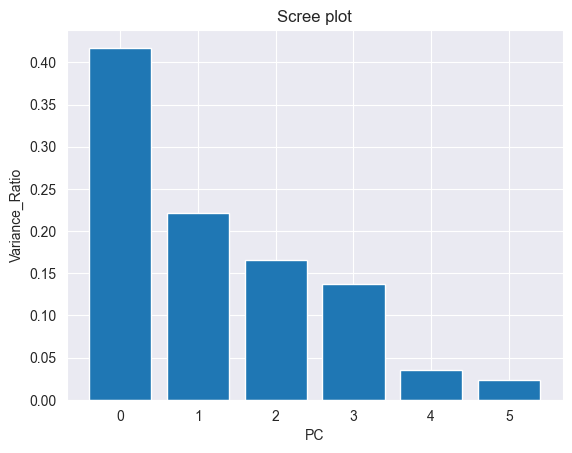

In [58]:
# 주성분 설명력 확인
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_
plt.bar(x, var) # Bar Plot 그리기

plt.xlabel('PC')
plt.ylabel('Variance_Ratio')
plt.title('Scree plot')

plt.savefig('img5.png', dpi = 300)
plt.show()

## 장점
변수가 가진 정보를 최대한 보존하는 방식으로 차원을 줄인다는 것이 PCA의 가장 큰 장점
 
#

## 단점
1. PCA의 결과로 찾아진 주성분의 의미를 해석하는 것이 어렵다.

- 주성분은 변수들 안에 포함된 여러 정보를 종합적으로 고려하여 새롭게 추출된 차원이므로, 하나의 주성분이 하나의 변수와 매칭되는 것이 아니라 여러 변수의 영향력을 종합적으로 받고 있기 때문에 결과로 확인된 주성분이 무엇을 의미하는지 명확하게 정의하기가 어렵다.



2. 해당 과정에 많은 연산이 필요합니다.

- 차원이 더 높은 데이터를 축소시킬수록 계산 비용이 급격히 증가되며 연산 시간이 오래 걸린다.
- PCA를 사용하기 전에는 데이터의 차원과 크기, 연산 환경을 고려하는 것이 필요하다.